# ROC Curve

Idealerweise berechnet das Modell zunächst eine Wahrscheinlichkeit, dass ein Ereignis einer der Klassen zugeordnet werden kann. In den meisten
Fällen muss dann ein geeigneter Schwellwert festgelegt werden, um das Ereignis einer der beiden Klassen zuzuordnen.

Der beste Wert für den Schwellenwert kann mittels der Grenzwertoptmerungskurve (Receiver Operator Characteristic Curve, ROC-Kurve)
analysiert werden. Sie zeigt die Abhängigkeit zwischen der Rate wahr positiver und wahr falscher Klassifizierungen bei jedem möglichen
Schwellenwert an.

## Import Libraries

In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot

## Generate Dataset

In [2]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

ns_probs = [1 for _ in range(len(testy))]

trainX = Eingabewerte zum Trainieren<br>
testX = Eingabewerte zum Testen<br>
trainy = Wahre Klassifikationen für die Trainingsbeispiele<br>
testy = Wahre Klassifikationen für die Testbeispiele

ns_probs = No-Skill Predictions

## Train Model & Predict Probabilities

In [3]:
# train a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

# predict probabilities
lr_probs = model.predict_proba(testX)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

lr_probs = Logistic Regression Predictions

## Calculate ROC curve

In [4]:
# Calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)

print('No Skill: ROC AUC-%.3f' % (ns_auc))
print('Logistic: ROC AUC-%.3f' % (lr_auc))

No Skill: ROC AUC-0.500
Logistic: ROC AUC-0.903


ns_auc = No-Skill Area Under the Curve (Güte des Klassifikationsmodells)<br>
lr_auc = Logistic Regression Area Under the Curve (Güte des Klassifikationsmodells)

In [5]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)


ns_fpr = No-Skill False Positive Rate <br>
ns_tpr = No-Skill True  Positive Rate <br>
lr_fpr = Logistic Regression False Positive Rate <br>
lr_tpr = Logistic Regression True  Positive Rate

## Plot ROC curve

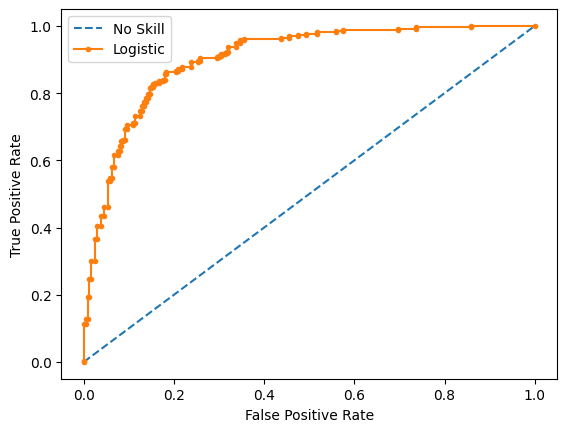

In [6]:
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()

pyplot.show()